   ### How to Handle Outliers in Machine Learning

#### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the dataset

In [2]:
dataset=pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Handling the Outliers for the Age Column

Text(0, 0.5, 'No of Passengers')

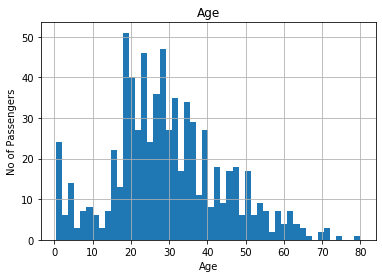

In [3]:
figure=dataset.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passengers')

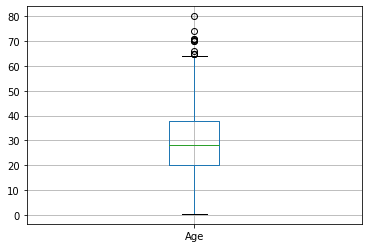

In [4]:
figure=dataset.boxplot(column='Age')

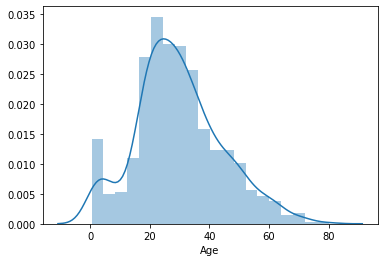

In [5]:
sns.distplot(dataset['Age'].dropna())

#### Here the Age columns in normally distributed that means we have to use empricial formula to calculate the Boundaries

In [6]:
upper_boundary=dataset['Age'].mean()+3*dataset['Age'].std()
lower_boundary=dataset['Age'].mean()-3*dataset['Age'].std()
print(lower_boundary),print(upper_boundary)

-13.88037434994331
73.27860964406095


(None, None)

In [7]:
dataset['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Handling the Outliers for Fare Column

Text(0, 0.5, 'No of Passengers')

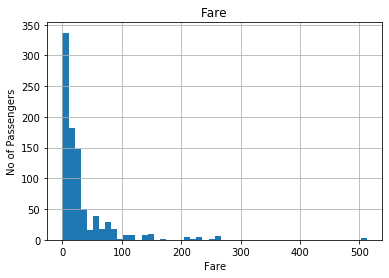

In [8]:
figure=dataset['Fare'].hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passengers')

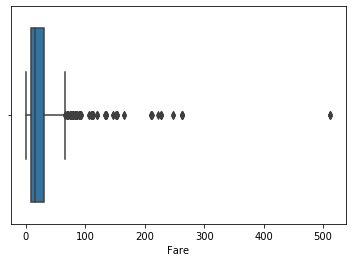

In [9]:
sns.boxplot(dataset['Fare'])

#### Here the Data is not Normally distributed and is following the Right Skewed distribution that means we can use the Interquartile Range to measure the boundaries for outliers

In [10]:
IQR= dataset['Fare'].quantile(0.75) - dataset['Fare'].quantile(0.25)
IQR

23.0896

In [11]:
## Calculating the boundaries
lower_bridge= dataset['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge= dataset['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [12]:
dataset['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

#### Here the maximum value of outliers is very high compare to upper boundary that indicates we need to calculate the extreme outliers boundaries

In [13]:
## Calculating the extreme boundaries
lower_bridge= dataset['Fare'].quantile(0.25)-(IQR*3)
upper_bridge= dataset['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

### Replacing the outliers
Since the lower boundaries of Age and Fare column is negative value we do not need to consider the lower boundary because as per the domain knowledge there won't be any negative values exists for Age and Fare Column

In [14]:
dataset.loc[dataset['Age']>=73,'Age']=73
dataset.loc[dataset['Fare']>=100,'Fare']=100